# Segmentación de triángulos

### Alumna: Salma Patricia Gutiérrez Rivera

__1.__ Segmentar las aristas de los triángulos. En los resultados, mostrar la imagen binaria de las aristas.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

In [3]:
triangulos = cv.imread("images/Triangulos.PNG", 0)

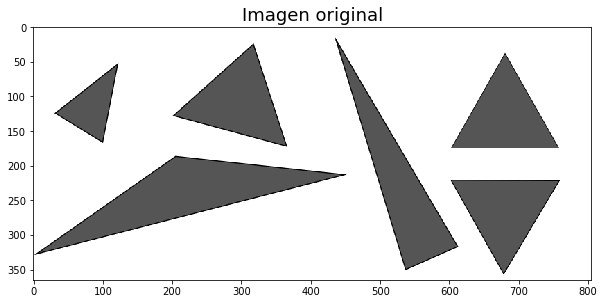

In [4]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(triangulos, cmap = 'gray');
plt.title("Imagen original", size = 18);

No hay ruido en la imagen y hay tres intensidades bien distinguibles: la del fondo, la de los contornos de los triángulos y la de su relleno, por lo que creí que bastaba una umbralización doble para extraer los contornos. No funcionó.

Después, los extraje mediante erosión con un kernel 3x3. Funcionó, pero una línea se quedó sin detectar, así que usé un kernel 5x5.

In [5]:
bin_triang = np.where(triangulos < 170, 255, 0)

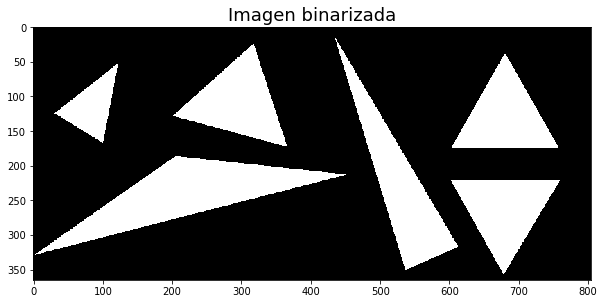

In [6]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(bin_triang, cmap = 'gray');
plt.title("Imagen binarizada", size = 18);

In [7]:
padd_bin_triang = cv.copyMakeBorder(bin_triang, 5, 5, 5, 5, cv.BORDER_CONSTANT)

In [8]:
imgu8 = np.uint8(padd_bin_triang)
kernel3 = np.ones((3, 3), np.uint8)
erode3_triang = cv.erode(imgu8, kernel3, iterations = 1)
contor3 = imgu8 - erode3_triang

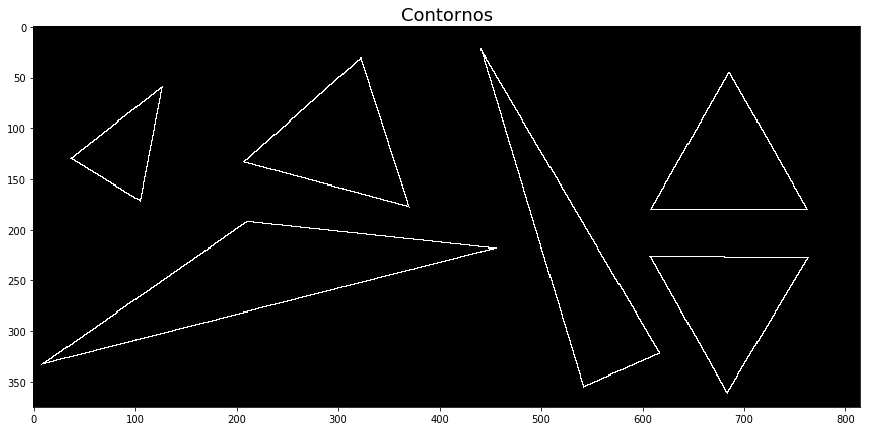

In [9]:
fig = plt.figure(figsize = (15, 7))
fig.add_subplot(1, 1, 1)
plt.imshow(contor3, cmap = 'gray');
plt.title("Contornos", size = 18);

__2.__ Encontrar los modelos de las rectas que forman cada arista. Para esto, solicite un umbral que elimine a las posibles aristas de longitud menor a dicho umbral. Los parámetros que debe encontrar de cada arista son $\theta$, $\rho$ y longitud. Hacer una tabla donde cada renglón sea una arista (identifíquelas con un número) y las columnas sean los parámetros indicados.

In [23]:
img_con_lineas = cv.cvtColor(contor3, cv.COLOR_GRAY2BGR)
lineas = cv.HoughLines(contor3, 1, np.pi / 180, 96, None, 0, 0)

for i in range(len(lineas)):
    rho = lineas[i][0][0]
    theta = lineas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(img_con_lineas, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

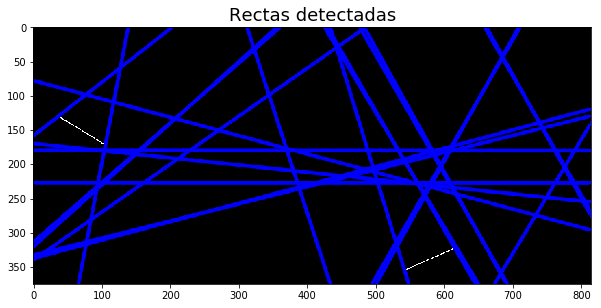

In [24]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineas);
plt.title("Rectas detectadas", size = 18);

In [12]:
print('Se detectaron', lineas.shape[0], 'rectas en la imagen')

Se detectaron 22 rectas en la imagen


Lo anterior indica __2 falsos negativos__ y __4 falsos positivos__.

In [13]:
print("recta\tradio    ángulo")

for i in range(len(lineas)):
    rho = lineas[i][0][0]
    theta = lineas[i][0][1] * 180.0 / math.pi
    print(i + 1, "\t", rho, "   ", theta)

recta	radio    ángulo
1 	 -415.0     162.99999201387476
2 	 278.0     54.999999253784715
3 	 169.0     96.00000267144338
4 	 323.0     75.99999983816295
5 	 -365.0     149.0000030079379
6 	 75.0     104.99999950679661
7 	 180.0     90.00000250447816
8 	 -571.0     149.99999734394112
9 	 -372.0     149.99999734394112
10 	 238.0     48.00000133572169
11 	 -297.0     161.99999767787153
12 	 616.0     30.000000834826057
13 	 326.0     74.99999867197056
14 	 771.0     30.99999858592387
15 	 125.0     51.999999170302104
16 	 620.0     28.99999966863366
17 	 -579.0     151.00000534032267
18 	 -423.0     151.00000534032267
19 	 236.0     48.9999990868195
20 	 -413.0     149.99999734394112
21 	 136.0     11.000000021511672
22 	 227.0     90.00000250447816


In [14]:
canny_edges = cv.Canny(contor3, 50, 200, None, 3)

img_con_lineas = cv.cvtColor(canny_edges, cv.COLOR_GRAY2BGR)
img_con_lineasp = np.copy(img_con_lineas)
lineas_p = cv.HoughLinesP(canny_edges, 1, np.pi / 180, 60, None, 60, 7)

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

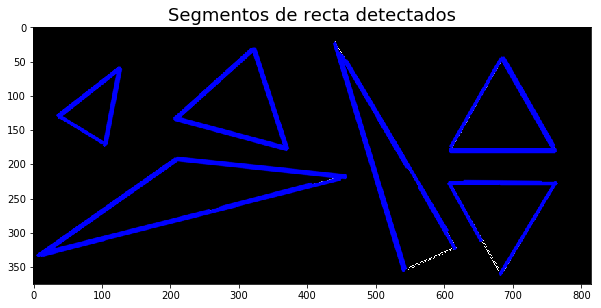

In [15]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineasp);
plt.title("Segmentos de recta detectados", size = 18);

In [16]:
print("Se detectaron", lineas_p.shape[0], "segmentos de recta")

Se detectaron 37 segmentos de recta


Claramente, están todas cortadas y las etiquetas no van a coincidir :(

In [17]:
print("segmento\tlongitud")

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    longitud = math.sqrt((l[2] - l[0])**2 + (l[3] - l[1])**2)
    print(i + 1, "\t", longitud)

segmento	longitud
1 	 347.02305398921266
2 	 328.34737702622203
3 	 253.69272752682525
4 	 247.37016796695596
5 	 246.37572932413616
6 	 138.49548729110273
7 	 169.799882214329
8 	 153.0
9 	 155.0
10 	 168.8342382338369
11 	 240.52650581588716
12 	 103.94229168149026
13 	 150.5257453062432
14 	 152.46311029229332
15 	 200.09247861926244
16 	 113.00442469213318
17 	 156.5790535161073
18 	 153.18289721767243
19 	 245.52392958732148
20 	 147.35331689514152
21 	 150.81445554057476
22 	 82.0
23 	 96.25487000666512
24 	 72.0
25 	 153.68799562750502
26 	 91.92388155425118
27 	 191.84629264074925
28 	 114.0175425099138
29 	 166.35504200354134
30 	 111.9866063420086
31 	 166.35504200354134
32 	 145.16542288024377
33 	 147.35331689514152
34 	 114.63420083029322
35 	 111.00450441310929
36 	 84.72307831990054
37 	 74.94664769020693


__3.__ Encontrar las aristas que son paralelas. Reporte cuántos grupos de aristas paralelas encontró y cuáles son paralelas entre ellas.

La rectas paralelas son las que tienen mismo ángulo y distinto radio. Por ahora, no voy a dar tolerancia.

In [20]:
mp = dict() 

for i in range(lineas.shape[0]): 
    if lineas[i][0][1] in mp.keys(): 
        mp[lineas[i][0][1]] += 1
    else: 
        mp[lineas[i][0][1]] = 1

ans = 0

for it in mp: 
    count = mp[it] 
    ans += (count * (count - 1)) // 2
    
print("Hay", ans, "pares de líneas paralelas")

Hay 5 pares de líneas paralelas


In [25]:
mp

{2.8448865: 1,
 0.9599311: 1,
 1.6755161: 1,
 1.3264502: 1,
 2.6005406: 1,
 1.8325957: 1,
 1.5707964: 2,
 2.6179938: 3,
 0.83775806: 1,
 2.8274333: 1,
 0.5235988: 1,
 1.3089969: 1,
 0.54105204: 1,
 0.9075712: 1,
 0.5061455: 1,
 2.6354473: 2,
 0.8552113: 1,
 0.19198622: 1}